# ナイーブベイズによる分類

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# matplotlib: 日本語フォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 
                               'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

# Iris データセット
iris = sns.load_dataset('iris')

# species が setosa のデータを除去
df = iris.query('species!="setosa"')
# speciesを 0, 1 にするためにダミー変数化
df = pd.get_dummies(data=df, drop_first=True)

# データセットの確認
df.iloc[[0, 50]]

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7.0,3.2,4.7,1.4,0
100,6.3,3.3,6.0,2.5,1


<hr>

### ナイーブベイズの精度の比較

説明変数

1. 一番重なりが少なそうな petal_width だけ
2. かなりの重なりがある sepat_width だけ
3. 全部 (sepal_length, sepal_width, petal_length, petal_width)

0: ['petal_width']
正確度: 0.940, 適合度: 0.958, 再現率: 0.920, 特異度: 0.960
1: ['sepal_width']
正確度: 0.580, 適合度: 0.574, 再現率: 0.620, 特異度: 0.540
2: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
正確度: 0.940, 適合度: 0.940, 再現率: 0.940, 特異度: 0.940


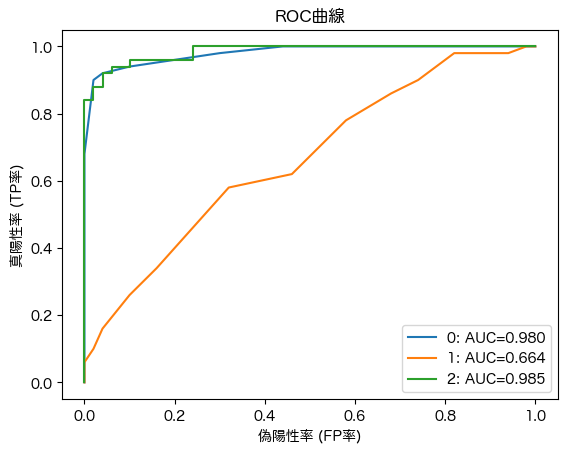

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

# 説明変数のリストと目的変数の設定
X_labels_list = [
    ['petal_width'],
    ['sepal_width'],
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
]
Y = df.species_virginica

# ナイーブベイズ
model = GaussianNB()

for i in range(0, len(X_labels_list)):
    # ラベルから説明変数の設定
    X_labels = X_labels_list[i]
    X = df[X_labels]
    # 学習
    model.fit(X, Y)
    # 教師データについてモデルからの予測値を計算
    Y_predict = model.predict(X)

    # 特異度の計算
    matrix = confusion_matrix(Y, Y_predict)
    specificity = matrix[0, 0] / (matrix[0, 1] + matrix[0, 0])
    # 精度
    print('{}: {}'.format(i, X_labels))
    print('正確度: {:.3f}, 適合度: {:.3f}, 再現率: {:.3f}, 特異度: {:.3f}'.format(
        accuracy_score(Y, Y_predict), precision_score(Y, Y_predict),
        recall_score(Y, Y_predict), specificity))
    # ROC, AUC
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    plt.plot(fpr, tpr, label='{}: AUC={:.3f}'.format(i, auc(fpr, tpr)))

plt.xlabel('偽陽性率 (FP率)')
plt.ylabel('真陽性率 (TP率)')
plt.title('ROC曲線')
plt.legend()
plt.show()

### ナイーブベイズ分類器の種類

- GaussianNB
  - 特徴量（説明変数）に正規分布を仮定する場合に使用
- BernoulliNB
  - 特徴量（説明変数）にベルヌーイ分布（結果が2通りの確率分布）を仮定する場合に使用
- MultinomialNB
  - 特徴量（説明変数）が整数のカウントデータ（単語の出現頻度など）を仮定する場合に使用

Irisの分類では GaussianNB を使用したが、テキストの分類の場合は MultinomialNB を使用する。